## <span style="background-color: #1A3D78; color: white; padding: 10px; font-size: 71px; font-weight: bold; border-radius: 5px;"> Automobile Price Prediction </span>

<img src="https://www.inovex.de/wp-content/uploads/2019/02/Price-Prediction-in-Online-Car-Marketplaces-1500x880.png" alt="Car Image">


# Importing libraries

In [1]:
# Import necessary libraries for data analysis and machine learning

import numpy as np               # Numerical computing library
import pandas as pd              # Data manipulation library
import matplotlib.pyplot as plt  # Data visualization library
import seaborn as sns            # Data visualization library for enhanced visuals
%matplotlib inline               

from sklearn.linear_model import LinearRegression       # Linear Regression model
from sklearn.model_selection import train_test_split    # Data split for model training and testing
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler  # Feature engineering and scaling

# Read the dataset from a CSV file into a Pandas DataFrame

In [2]:
# We specify 'na_values' to treat '?' as missing values
car = pd.read_csv("Automobile_data.csv",na_values="?")

# Inspect The Data

In [13]:
# Display the dimensions of the 'car' DataFrame
car.shape

(205, 26)

In [4]:
# Display the first 10 rows of the 'car' DataFrame to inspect the data
car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [5]:
# Display the column names of the 'car' DataFrame to inspect the available features
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# Display the information about the 'car' DataFrame to get an overview of data types and missing values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
# Display the data types of each column in the 'car' DataFrame
car.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [8]:
# Select columns with data type 'object' from the 'car' DataFrame
car.columns[car.dtypes=="object"]

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [9]:
# Generate descriptive statistics for the numeric columns in the 'car' DataFrame
car.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Dealing with nulls

In [10]:
# Count the number of missing values in each column of the 'car' DataFrame
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

> normalized-losses has 41 null value and it is the max column has number of nan

In [17]:
# Get unique values in the 'normalized-losses' column of the 'car' DataFrame
car["normalized-losses"].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [18]:
# Count the occurrences of each value in the 'normalized-losses' column of the 'car' DataFrame
car["normalized-losses"].value_counts()

161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: normalized-losses, dtype: int64

In [27]:
# Calculate the mean value for each column in the 'car' DataFrame
avg = car.mean().round(2)

C:\Users\User\AppData\Local\Temp/ipykernel_15464/2027148375.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = car.mean().round(2)


In [28]:
# Create a copy of the 'car' DataFrame and assign it to 'car_df'
car_df = car.copy()

In [29]:
# Fill missing values in the 'car_df' DataFrame with the mean values calculated earlier
car_df = car_df.fillna(avg)

In [30]:
# Check for missing values in the 'car_df' DataFrame after imputation
car_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [31]:
# Count the occurrences of each value in the 'num-of-doors' column of the 'car_df' DataFrame
car_df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [32]:
# Get the unique values in the 'num-of-doors' column of the 'car_df' DataFrame
car_df["num-of-doors"].unique()

array(['two', 'four', nan], dtype=object)

In [34]:
# Fill missing values in the 'num-of-doors' column with "four" that is the majority class
car_df["num-of-doors"] = car_df["num-of-doors"].fillna("four")

In [35]:
# Get the unique values in the 'num-of-doors' column after filling missing values
car_df["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

# Categorical feature transformation

In [40]:
# Select columns with data type 'object' in the 'car_df' DataFrame
car_df.select_dtypes(include=["object"]).head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [41]:
# Create a copy of the 'car_df' DataFrame and assign it to 'car_df2'
car_df2 = car_df.copy()

In [42]:
# Replace values in the 'num-of-doors' column of the 'car_df2' DataFrame
# "two" is replaced with the integer 2, and "four" is replaced with the integer 4
car_df2["num-of-doors"] = car_df2["num-of-doors"].replace({"two": 2, "four": 4})

In [44]:
# Get the unique values in the 'num-of-cylinders' column of the 'car_df2' DataFrame
car_df2["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [45]:
# Mapping string values to their corresponding numerical values
car_df2["num-of-cylinders"] = car_df2["num-of-cylinders"].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [46]:
# Get the unique values in the 'num-of-cylinders' column after replacement
car_df2["num-of-cylinders"].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [48]:
# Select columns with data type 'object' in the 'car_df2' DataFrame
car_df2.select_dtypes(include=["object"]).head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


# Data correlation

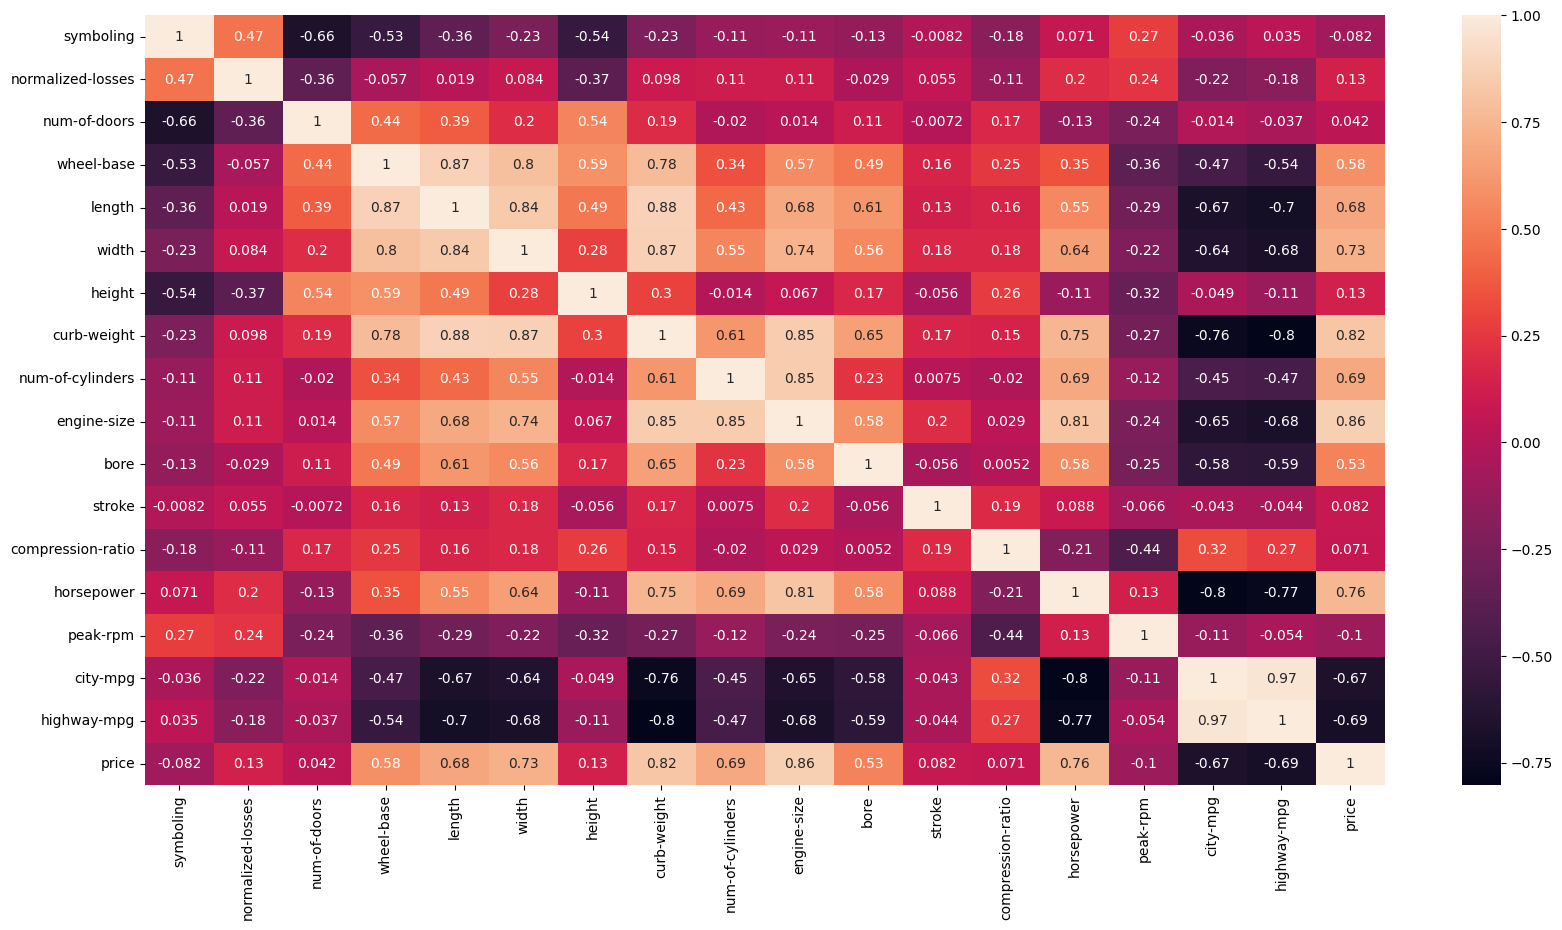

In [50]:
# Create a heatmap to visualize the correlation between numeric columns

plt.figure(figsize=(20, 10))  
sns.heatmap(car_df2.corr(numeric_only=True), annot=True);

In [53]:
# Calculate and sort the correlations between numeric columns 
feature_corr = car_df2.corr(numeric_only=True).unstack().sort_values()
feature_corr.head(10)

city-mpg     horsepower    -0.803162
horsepower   city-mpg      -0.803162
highway-mpg  curb-weight   -0.797465
curb-weight  highway-mpg   -0.797465
highway-mpg  horsepower    -0.770903
horsepower   highway-mpg   -0.770903
curb-weight  city-mpg      -0.757414
city-mpg     curb-weight   -0.757414
highway-mpg  length        -0.704662
length       highway-mpg   -0.704662
dtype: float64

In [58]:
# Create a DataFrame 'high_corr_df' containing feature correlations with absolute values > 0.7 and < 1 (without duplicates)

high_corr_df = pd.DataFrame(feature_corr[(abs(feature_corr) > 0.7) & (abs(feature_corr) < 1)].drop_duplicates())

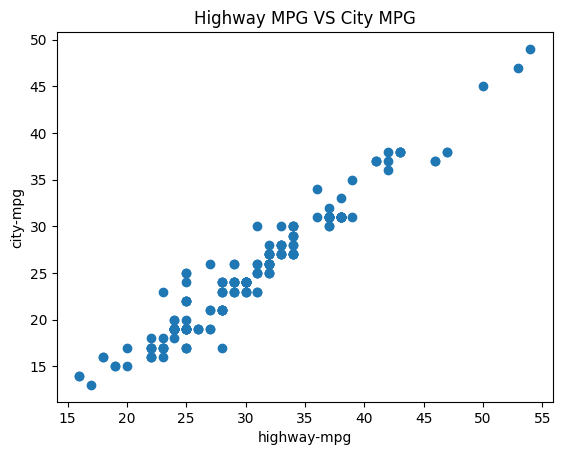

In [67]:
# check on of the high corr features
plt.scatter(car_df2["highway-mpg"],car_df2["city-mpg"]);
plt.xlabel("highway-mpg")
plt.ylabel("city-mpg")
plt.title("Highway MPG VS City MPG");

<Figure size 2000x400 with 0 Axes>

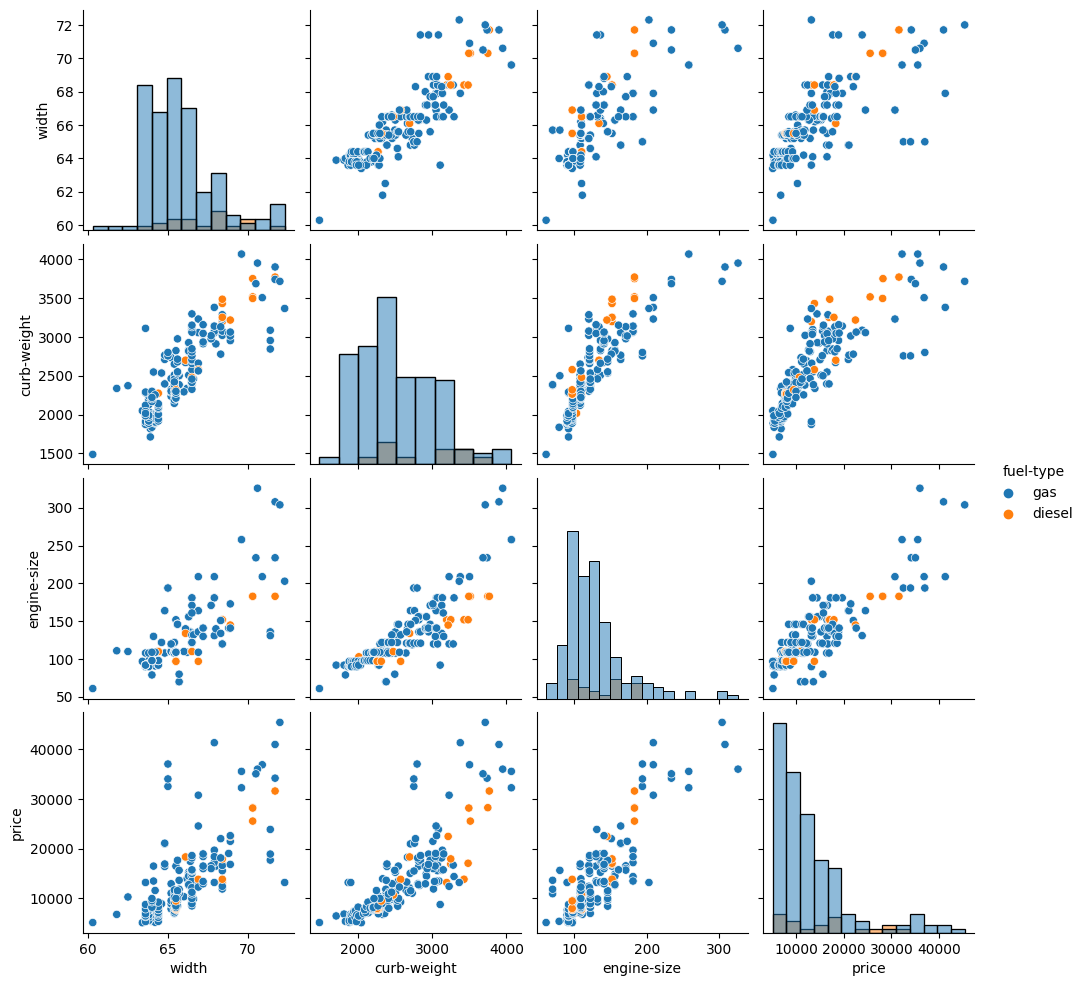

In [70]:
# Create a pair plot to visualize relationships between selected numeric columns in 'car_df2' Differentiate data points by 'fuel-type' using color

plt.figure(figsize=(20, 4))  # Set the figure size for the pair plot
sns.pairplot(car_df2[["width", "curb-weight", "engine-size", "price", "fuel-type"]], diag_kind='hist', hue="fuel-type")
plt.show()

# Feature reduction

In [71]:
# Create a new DataFrame 'car_reduc' by dropping specified columns from 'car_df2'
car_reduc = car_df2.drop(columns=["width","length","wheel-base","engine-size","highway-mpg","horsepower","city-mpg"])

In [72]:
# Display information about the 'car_reduc' DataFrame
car_reduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   height             205 non-null    float64
 10  curb-weight        205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  num-of-cylinders   205 non-null    int64  
 13  fuel-system        205 non-null    object 
 14  bore               205 non-null    float64
 15  stroke             205 non-null    float64
 16  compression-ratio  205 non

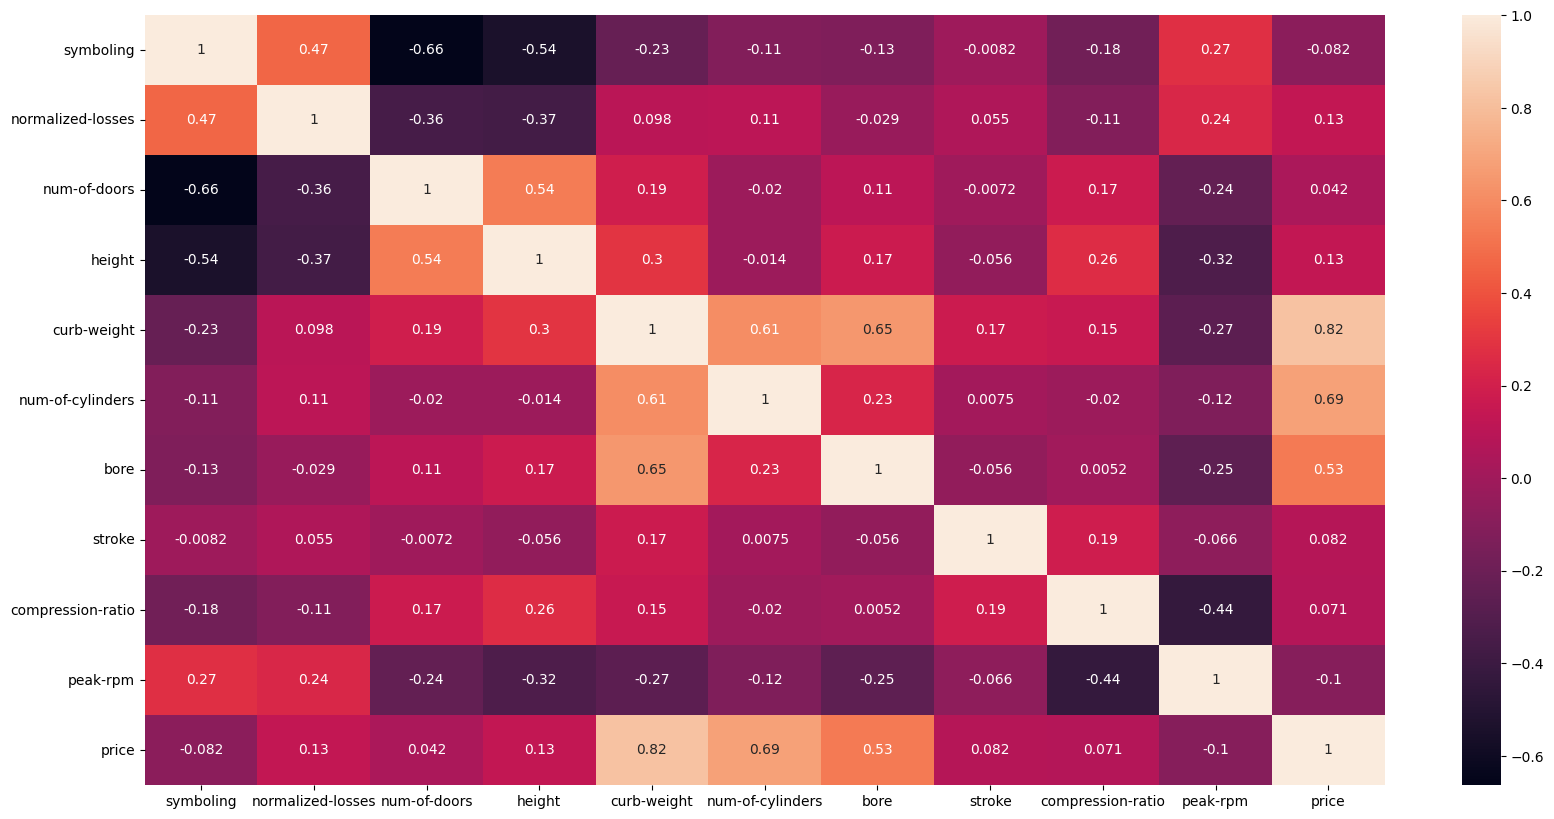

In [74]:
# Create a heatmap to visualize the correlation between numeric columns in the 'car_reduc' DataFrame

plt.figure(figsize=(20,10))
sns.heatmap(car_reduc.corr(numeric_only=True),annot=True);

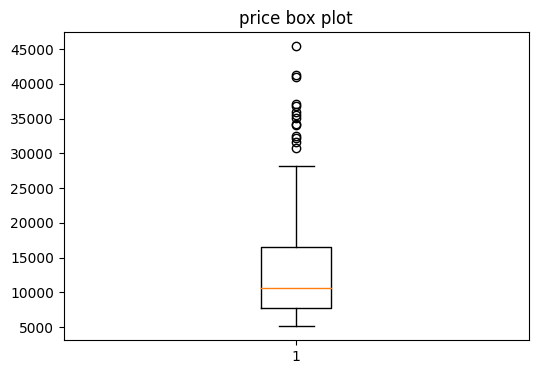

In [77]:
# Create a box plot to visualize the distribution of the 'price' column in the 'car_reduc' DataFrame
plt.figure(figsize=(6,4))
plt.boxplot(car_reduc["price"])
plt.title("price box plot")
plt.show()

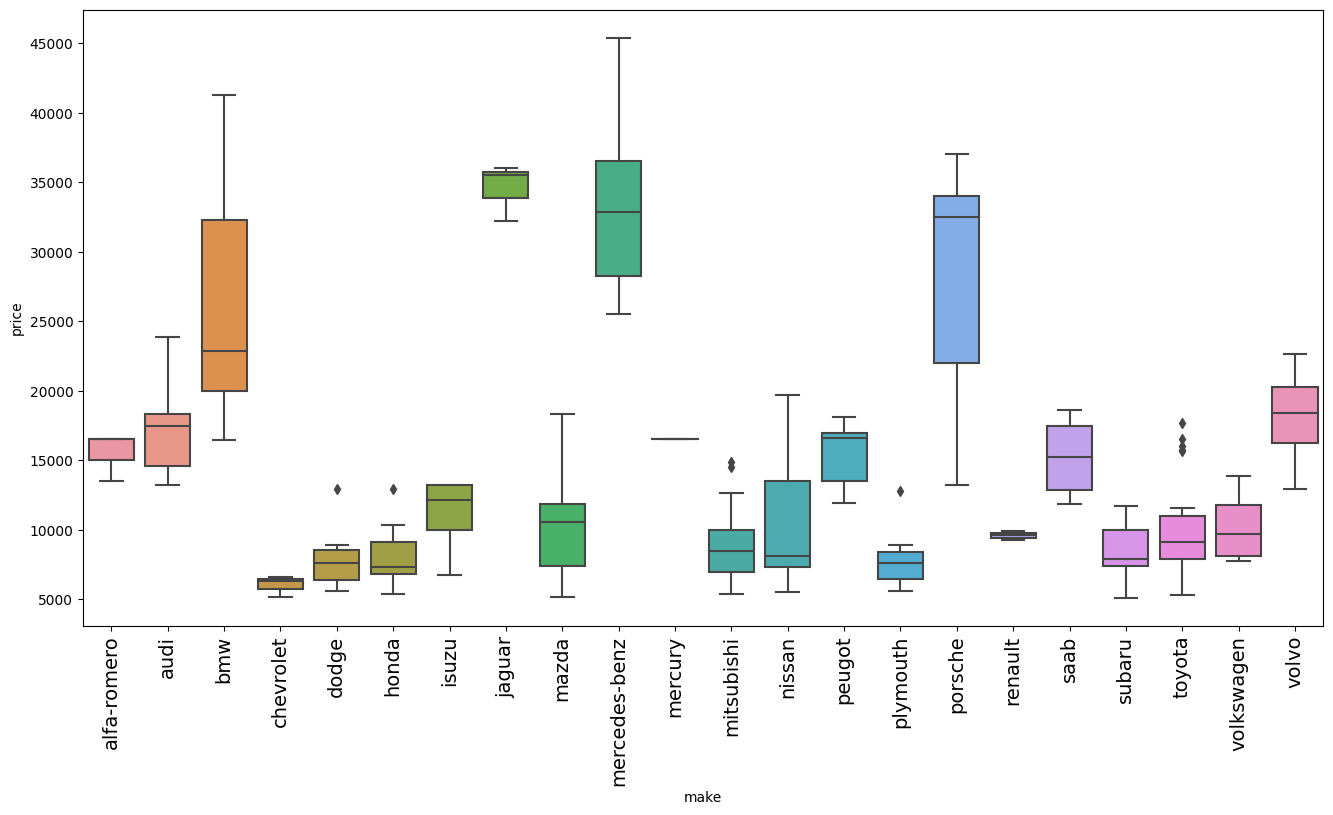

In [78]:
# Create a box plot to visualize the distribution of 'price' by car make in the 'car_reduc' DataFrame
plt.figure(figsize=(16,8))
sns.boxplot(x = car_reduc["make"],y = car_reduc["price"])
plt.xticks(rotation = "vertical",size=14)
plt.show()

# Categorical Feature Transformtaion

In [81]:
# Perform one-hot encoding on the 'car_reduc' DataFrame, dropping the first category for each categorical variable
car_clear = pd.get_dummies(car_reduc, drop_first=True)

# Split The Dataset into feature and target

In [82]:
# Split the 'car_clear' DataFrame into feature variables (X) and the target variable (y)
x = car_clear.drop("price",axis=1)
y = pd.DataFrame(car_clear["price"])

# Split The Dataset into train and test

In [83]:
# Split the data into training and testing sets for features (X) and target variable (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [85]:
# Print the shapes of the training and testing sets for features (X) and the target variable (y)
print("x_train shape :",x_train.shape)
print("x_test shape :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

x_train shape : (143, 53)
x_test shape : (62, 53)
y_train shape : (143, 1)
y_test shape : (62, 1)


# Numerical Feature Scaling

In [86]:
# Initialize Min-Max scalers for feature variables (X) and the target variable (y) based on the training data
scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)

In [87]:
# Transform the training feature variables (X) and the training target variable (y) using the Min-Max scalers
x_train_sc = scaler_x.transform(x_train)
y_train_sc = scaler_y.transform(y_train)

In [88]:
# Transform the testing feature variables (X) and the testing target variable (y) using the Min-Max scalers
x_test_sc = scaler_x.transform(x_test)
y_test_sc = scaler_y.transform(y_test)

# Apply Linear Regression

In [89]:
# Initialize a Linear Regression model
lr_model = LinearRegression()

In [90]:
# Fit the Linear Regression model to the scaled training data
lr_model.fit(x_train_sc,y_train_sc)

LinearRegression()

In [91]:
# Use the trained Linear Regression model to make predictions on the scaled testing data
y_pred_sc = lr_model.predict(x_test_sc)

# Evaluating the model

In [92]:
# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test_sc,y_pred_sc)
rmse = np.sqrt(mean_squared_error(y_test_sc,y_pred_sc))

print("MAE =",mae.round(4))
print("RMSE =",rmse.round(4))

MAE = 0.076
RMSE = 0.1258


In [93]:
# Inverse transform the scaled testing target variable to obtain original values
y_test_inv = scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))

In [95]:
# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) using original, unscaled values
Actual_mae = mean_absolute_error(y_test_inv,y_pred_inv)
Actual_rmse = np.sqrt(mean_squared_error(y_test_inv,y_pred_inv))

print("Actual MAE =",Actual_mae.round(4))
print("Actual RMSE =",Actual_rmse.round(4))

Actual MAE = 2716.3578
Actual RMSE = 4498.3807


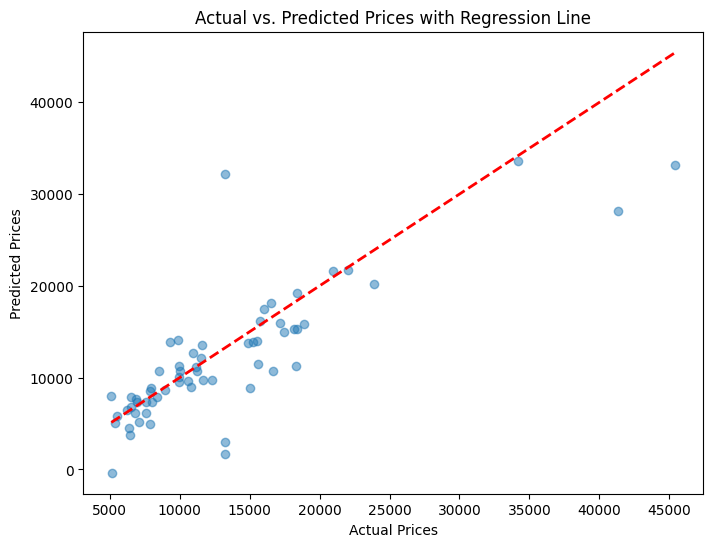

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.5)
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices with Regression Line")
plt.show()

## <span style="background-color: #1A3D78; color: white; padding: 10px; font-size: 46px; font-weight: bold; border-radius: 5px;"> Happy coding and data science adventures!
 </span>